# One - Way ANOVA
****

The task is base on, an example hypothesis test using ANOVA, finding a data set on which
it is appropriate to use ANOVA, ensure the assumptions underlying ANOVA are
met, and then I will perform and display the results of your ANOVA using scipy.stats
****

The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of two or more independent (unrelated) groups (although you tend to only see it used when there are a minimum of three, rather than two groups). For example, you could use a one-way ANOVA to understand whether exam performance differed based on test anxiety levels amongst students, dividing students into three independent groups (e.g., low, medium and high-stressed students). Also, it is important to realize that the one-way ANOVA is an omnibus test statistic and cannot tell you which specific groups were statistically significantly different from each other; it only tells you that at least two groups were different. Since you may have three, four, five or more groups in your study design, determining which of these groups differ from each other is important. You can do this using a post hoc test.

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

https://github.com/ianmcloughlin/python_anova/blob/main/one_way_anova.ipynb

In [9]:
# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Stats.
import scipy.stats as ss

# Numerical arrays.
import numpy as np

# Collections.
import collections as co

# Specials.
import scipy.special as spec

import matplotlib.pyplot as plt

### Loading The Data Set

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/G00387847/machineLearningTask/main/sleep.csv")
df

,Unnamed: 0,weight,group
0,1,4.7,ABC1
1,2,5.6,ABC1
2,3,4.2,ABC1
3,4,6.2,ABC1
4,5,5.1,ABC1
5,6,3.4,ABC1
6,7,3.7,CBA1
7,8,6.8,CBA1
8,9,5.2,CBA1
9,10,4.2,CBA1


### Assumption #1: Dependent Variable
****
This should be measured at the interval or ratio level (i.e., they are continuous)

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

In [11]:
# The dependent variable.
dependent = df['weight']
dependent

0     4.7
1     5.6
2     4.2
3     6.2
4     5.1
5     3.4
6     3.7
7     6.8
8     5.2
9     4.2
10    4.9
11    5.8
12    6.1
13    5.1
14   -4.1
15    4.4
16    5.5
17    4.6
18    4.6
19    3.4
Name: weight, dtype: float64

In [12]:
dependent.describe()

count    20.000000
mean      4.470000
std       2.215519
min      -4.100000
25%       4.200000
50%       4.800000
75%       5.525000
max       6.800000
Name: weight, dtype: float64

### Assumption #2: Independent Variable
****
This should consist of two or more categorical, independent groups.

In [13]:
# Independent variable.
independent = df['group']
independent

0     ABC1
1     ABC1
2     ABC1
3     ABC1
4     ABC1
5     ABC1
6     CBA1
7     CBA1
8     CBA1
9     CBA1
10    CBA1
11    CBA1
12    CBA1
13    CBA1
14    ABC2
15    ABC2
16    ABC2
17    ABC2
18    ABC2
19    ABC1
Name: group, dtype: object

### Assumption #4
****
There should be no significant outliers. Outliers are simply single data points within your data that do not follow the usual patter

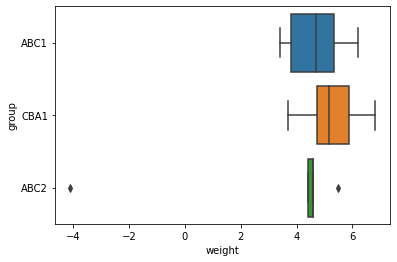

In [14]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent, y=independent)

#### Assumption #5
****
The dependent variable should be approximately normally distributed for each category of the independent variable

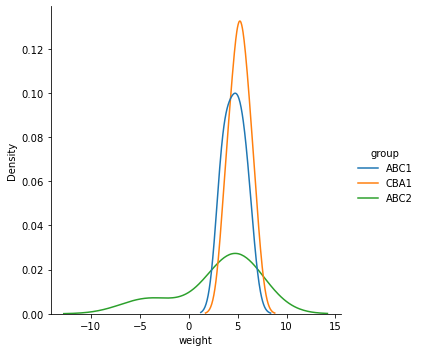

In [15]:
# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

In [21]:
# Extract the ABC1 sepal lengths.
weight_ABC1 = dependent[independent == 'ABC1']
weight_ABC1

0     4.7
1     5.6
2     4.2
3     6.2
4     5.1
5     3.4
19    3.4
Name: weight, dtype: float64

In [22]:
#Shapiro-Wilk test.
ss.shapiro(weight_ABC1)

ShapiroResult(statistic=0.9423917531967163, pvalue=0.660348117351532)

In [23]:
#  test for the CBA1.
ss.shapiro(dependent[independent == 'CBA1'])

ShapiroResult(statistic=0.9850362539291382, pvalue=0.9834312796592712)

In [24]:
# test for the ABC2.
ss.shapiro(dependent[independent == 'ABC2'])

ShapiroResult(statistic=0.6484090089797974, pvalue=0.0025496932212263346)

### Assumption #6
****

There needs to be homogeneity of variances.  You can test this assumption in SPSS Statistics using Levene's test for homogeneity of variances

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

In [25]:
# Test for equal variances.
ss.levene(
    dependent[independent == 'ABC1'],
    dependent[independent == 'CBA1'],
    dependent[independent == 'ABC2']
)

LeveneResult(statistic=0.7061239036607795, pvalue=0.5074671511453015)

#### Computing One-Way ANOVA Test
****

In [26]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'ABC1'],
    dependent[independent == 'CBA1'],
    dependent[independent == 'ABC2']
)

F_onewayResult(statistic=1.7086944523654026, pvalue=0.21077258488428877)

#### Interpreting The Result:
*****
we can conclude that there are significant differences between the weight of ABC1,CB1 and ABC2.

#### Different Variances
*****

https://github.com/ianmcloughlin/python_anova/blob/main/one_way_anova.ipynb

In [27]:
def welch_anova_np(*args, var_equal=False):
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = co.namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni = np.array([len(arg) for arg in args])
    mi = np.array([np.mean(arg) for arg in args])
    vi = np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = spec.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

In [28]:
# Perform the test.
welch_anova_np(
    dependent[independent == 'ABC1'],
    dependent[independent == 'CBA1'],
    dependent[independent == 'ABC2']
)

F_onewayResult(statistic=1.0709792102399702, pvalue=0.3858510001430788)

#### Conclusion:
*****
 The mean weight of ABC1, CBA1, and ABC2 shows , they are all different.

#### Statsmodels One-Way ANOVA
****

https://github.com/marsja/jupyter/blob/master/Python_ANOVA/One_Way_Python_ANOVA.ipyn

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

             sum_sq    df         F    PR(>F)
group     15.609857   2.0  1.708694  0.210773
Residual  77.652143  17.0       NaN       NaN


#### Calculating Eta-Squared
****
https://github.com/marsja/jupyter/blob/master/Python_ANOVA/One_Way_Python_ANOVA.ipynb

In [31]:
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])

aov_table['EtaSq'] = [esq_sm, 'NaN']
print(aov_table)

             sum_sq    df         F    PR(>F)     EtaSq
group     15.609857   2.0  1.708694  0.210773  0.167376
Residual  77.652143  17.0       NaN       NaN       NaN


### Pairwise Comparisons
****

https://github.com/marsja/jupyter/blob/master/Python_ANOVA/One_Way_Python_ANOVA.ipynb

In [32]:
pair_t = mod.t_test_pairwise('group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
ABC2-ABC1,-1.657143,1.251437,-1.324192,0.202968,-4.297443,0.983158,0.364740,False
CBA1-ABC1,0.567857,1.106124,0.513376,0.614296,-1.765861,2.901575,0.614296,False
CBA1-ABC2,2.225000,1.218411,1.826148,0.085444,-0.345623,4.795623,0.235053,False
